In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob 

/Users/mariaclara1985/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [54]:
data202103 = pd.read_csv("CAGEDMOV202103.txt", sep=';')
data202103.head()

,competência,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,fonte
0,202103,5,52,520110,C,2910701,1,784205,101,7,...,0,1,20,0,0,0,1441.079956,10,0,1
1,202103,4,43,431990,C,1531901,-1,411010,101,9,...,0,1,31,0,0,0,2800.000000,9,0,1
2,202103,4,42,421500,C,2512800,-1,784205,101,7,...,0,1,43,0,0,0,1365.000000,1,0,1
3,202103,4,43,432260,C,1210700,1,514320,101,4,...,0,1,20,0,0,0,1269.400024,6,0,1
4,202103,3,31,317020,I,5611201,-1,513505,101,7,...,0,1,31,0,0,0,1141.469971,5,0,1


In [60]:
data202102 = pd.read_csv("CAGEDMOV202102.txt", sep=';')
data202102.head()

,competência,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,fonte
0,202102,5,52,520870,Q,8610102,-1,515110,101,5,...,0,1,31,0,0,0,1033.260010,9,0,1
1,202102,3,35,352470,J,6203100,-1,317210,101,9,...,0,1,40,0,0,0,1675.560059,10,0,1
2,202102,4,43,431490,F,4399199,1,721325,101,7,...,0,1,20,0,0,0,2182.399902,7,0,1
3,202102,3,35,355030,M,7112000,1,717020,101,6,...,0,1,20,0,0,0,1711.420044,7,0,1
4,202102,4,43,431490,G,4761001,-1,422305,101,7,...,0,1,43,0,0,0,1188.250000,7,0,1


# 1 – Qual foi o índice de pessoas empregadas e desempregadas em certo período, categorizadas por: 

```
data['saldomovimentação'].value_counts().sort_index()
-1    1292965
 1    1694604
Name: saldomovimentação, dtype: int64
```

##	- Gênero

```
data['sexo'].value_counts()
```

* 1	Homem
* 3	Mulher
* 9	Não Identificado



In [55]:
# data['saldomovimentação'].value_counts().sort_index()

fired = data202103['saldomovimentação'] == -1
hired = data202103['saldomovimentação'] == 1
fema = data202103['sexo'] == 3
male = data202103['sexo'] == 1

In [85]:
# lista de todos os arquivos
caged_files = sorted(glob('CAGEDMOV*.txt'))
# pd.concat((pd.read_csv(file) for file in caged_files))
# print(caged_files)
pandemia_df = pd.concat((pd.read_csv(file, sep=';') for file in caged_files), ignore_index=True)

In [92]:
caged_files

['CAGEDMOV202002.txt',
 'CAGEDMOV202101.txt',
 'CAGEDMOV202102.txt',
 'CAGEDMOV202103.txt']

In [86]:
pandemia_df.shape

(11806700, 24)

In [91]:
pandemia_df.tail()

,competência,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,fonte
11806695,202103,3,35,355030,A,151201,1,724315,102,7,...,2,3,10,0,0,0,1500.000000,99,0,1
11806696,202103,3,35,355030,I,5620101,1,513205,111,7,...,0,1,20,0,1,0,6567.000000,7,0,1
11806697,202103,2,25,251370,C,1532700,-1,764105,101,7,...,0,1,31,0,0,0,1122.000000,10,0,1
11806698,202103,3,33,330455,I,5510801,-1,513505,101,6,...,0,1,31,0,0,0,1021.419983,5,0,1
11806699,202103,3,35,354980,G,4530701,-1,142105,101,9,...,0,1,31,0,0,0,4500.000000,4,0,1


In [87]:
pandemia_df.columns

Index(['competência', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'cbo2002ocupação', 'categoria', 'graudeinstrução',
       'idade', 'horascontratuais', 'raçacor', 'sexo', 'tipoempregador',
       'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
       'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan',
       'indicadoraprendiz', 'fonte'],
      dtype='object')

In [77]:
data202103['região'].value_counts()

3    1585903
4     681046
2     389814
5     252367
1     122606
9        138
Name: região, dtype: int64

In [56]:
data202103[hired]['sexo'].value_counts()

1    988324
3    619683
Name: sexo, dtype: int64

In [53]:
maiorque202102 = data['competência'] > 202102
maiorque202103 = data['competência'] < 202103
data[maiorque202103 & maiorque202102].head()

,competência,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,fonte


<AxesSubplot:ylabel='sexo'>

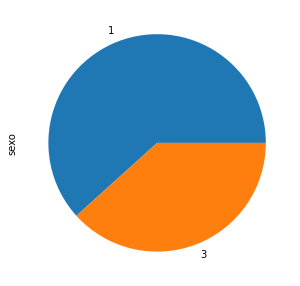

In [62]:
data[fired]['sexo'].value_counts().plot.pie(figsize=(5, 5))

<AxesSubplot:ylabel='sexo'>

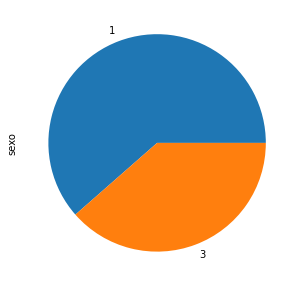

In [59]:
data[hired]['sexo'].value_counts().plot.pie(figsize=(5, 5))

In [39]:
data[male & hired].head(10)

,competência,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,fonte
0,202103,5,52,520110,C,2910701,1,784205,101,7,...,0,1,20,0,0,0,1441.079956,10,0,1
5,202103,3,35,355030,F,4399103,1,717020,101,7,...,0,1,20,0,0,0,1551.000000,3,0,1
6,202103,1,13,130260,C,2622100,1,784205,101,7,...,0,1,20,0,0,0,1380.000000,6,0,1
8,202103,4,42,420430,C,2512800,1,414105,101,9,...,0,1,20,0,0,0,1500.000000,5,0,1
10,202103,3,35,355030,F,4299599,1,715210,999,4,...,9,4,20,0,0,0,2042.000000,1,0,1
19,202103,3,35,351860,B,810006,1,724315,101,7,...,0,1,20,0,0,0,1599.400024,4,0,1
21,202103,3,31,316720,G,4711302,1,521125,103,6,...,0,1,10,0,0,0,533.429993,7,1,1
22,202103,3,35,355030,N,7820500,1,782220,101,7,...,0,1,20,0,0,0,2627.189941,8,0,1
25,202103,3,35,355030,F,4120400,1,715310,999,7,...,0,1,20,0,0,0,1870.000000,5,0,1
26,202103,4,43,430960,G,4711302,1,414105,101,7,...,0,1,20,0,0,0,1305.000000,6,0,1


In [26]:
data['sexo'].value_counts()

1    1866683
3    1165191
Name: sexo, dtype: int64

##	- Classe social
O IBGE utiliza uma definição de classe social baseada na faixa salarial. A renda é dividida em cinco classificações, conforme a quantidade de salários mínimos na renda mensal das famílias. As classes são categorizadas em:
* salário mínimo R$ 1.100
* A (acima de vinte salários mínimos);
* B (dez a vinte salários mínimos);
* C (quatro a dez salários mínimos);
* D (dois a quatro salários mínimos),
* E (até dois salários mínimos).
##	- Faixa Etária 
```
data['idade'].value_counts().sort_index()
```
##	- Nível de escolaridade
```
data['graudeinstrução'].value_counts()
```

*	1	Analfabeto
*	2	Até 5ª Incompleto
*	3	5ª Completo Fundamental
*	4	6ª a 9ª Fundamental
*	5	Fundamental Completo
*	6	Médio Incompleto
*	7	Médio Completo
*	8	Superior Incompleto
*	9	Superior Completo
*	10	Mestrado
*	11	Doutorado
*	80	Pós-Graduação completa
*	99	Não Identificado
##	- Setores (Agronegócio, Indústria, Comércio, etc...) 

```
data['seção'].value_counts()
```

*	A	Agricultura, Pecuária, Produção Florestal, Pesca e AqÜIcultura
*	B	Indústrias Extrativas
*	C	Indústrias de Transformação
*	D	Eletricidade e Gás
*	E	Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação
*	F	Construção
*	G	Comércio, Reparação de Veículos Automotores e Motocicletas
*	H	Transporte, Armazenagem e Correio
*	I	Alojamento e Alimentação
*	J	Informação e Comunicação
*	K	Atividades Financeiras, de Seguros e Serviços Relacionados
*	L	Atividades Imobiliárias
*	M	Atividades Profissionais, Científicas e Técnicas
*	N	Atividades Administrativas e Serviços Complementares
*	O	Administração Pública, Defesa e Seguridade Social
*	P	Educação
*	Q	Saúde Humana e Serviços Sociais
*	R	Artes, Cultura, Esporte e Recreação
*	S	Outras Atividades de Serviços
*	T	Serviços Domésticos
*	U	Organismos Internacionais e Outras Instituições Extraterritoriais
*	Z	Não identificado

In [3]:
data.shape

(2987569, 24)

In [4]:
data.columns

Index(['competência', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'cbo2002ocupação', 'categoria', 'graudeinstrução',
       'idade', 'horascontratuais', 'raçacor', 'sexo', 'tipoempregador',
       'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
       'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan',
       'indicadoraprendiz', 'fonte'],
      dtype='object')

In [11]:
# data['sexo'].value_counts()
# data['seção'].value_counts()
# data['graudeinstrução'].value_counts()
data['idade'].value_counts().sort_index()

14.0      395
15.0     3187
16.0    11010
17.0    23868
18.0    50143
        ...  
91.0        1
92.0        1
93.0        2
97.0        2
98.0        4
Name: idade, Length: 82, dtype: int64

In [26]:
1012750+789586 ##soma de admissoes&demissoes homens

1802336

In [57]:
681854+503379 ##soma de admissoes&demissoes mulheres

1185233

In [5]:
# fem = data['sexo'] == 3
data['graudeinstrução'].value_counts().sort_index()

1       12694
2       67499
3       49201
4      147173
5      236727
6      241797
7     1772389
8      127481
9      290154
10       8339
11       3034
80      31081
Name: graudeinstrução, dtype: int64

In [10]:
data['salário']

0          1033.260010
1          1675.560059
2          2182.399902
3          1711.420044
4          1188.250000
              ...     
2987564    1952.770020
2987565    1200.000000
2987566    1923.500000
2987567    1084.050049
2987568    2100.000000
Name: salário, Length: 2987569, dtype: float64

In [11]:
data['saldomovimentação'].value_counts().sort_index()

-1    1292965
 1    1694604
Name: saldomovimentação, dtype: int64

2 – Quais foram as estatísticas de consumo/gastos após o aumento ou diminuição do: 
	- Emprego 
	- Desemprego 

3 - Quero saber a quantidade de admissões/demissões por gênero no período da pandemia.

4 - Quero saber a quantidade de demissões por tipo, tipo movimentação / demissão.
	- Diferença salarial entre homens e mulheres admitidos;
    	- Diferença salarial entre homens e mulheres demitidos;
    	- Média salarial por raça/cor;
    

5 - Quero poder visualizar as causas de demissão formalizadas pelos empregadores distribuídas por sexo, raça/cor e faixa etária;